A lookup table was trained on the following parameters

In [2]:
# Training parameters
N_timesteps = range(1,6) # Number of time steps to test
N_samples = 5 # Number of random initializations to test
N_training_iterations = 1000 # Number of training iterations
learning_rate = 0.02 # Learning rate

# System parameters
n = 5 # Number of qubits
measurement_sites = [0, 3] # Sites where measurements are performed (0-indexed)
flip_sites = [2, 4] # Sites to be flipped (0-indexed)
control_qubit = 0 # Qubit where control rotations are applied (0-indexed)
decay_constant = (0.005)**0.5 # Decay constant for amplitude damping

Below are the best fidelities out of 5 runs each, evaluated on a batch size of 10. From left to right for 1 ... 5 training timesteps and from up to down for different system parameters. M stands for measurement, R for Bloch rotation, T for transport, D for Decay. The gates are as defined in example_E.ipynb

In [3]:
fidelities_wo_msmt = [
    [0.0, 0.0, 0.0, 0.0, 0.0],                                                                             # (control qubit:  no, povm:  no, decay:  no) (T)^N
    [0.0, 2.5801357614596514e-06, 0.9999973956817952, 0.9999948435944875, 0.9999776833249817],             # (control qubit: yes, povm:  no, decay:  no) (RT)^N
    [0.0, 2.5035316437091724e-06, 0.9512269420962641, 0.9511000789262692, 0.9511609314821533],             # (control qubit: yes, povm:  no, decay: yes) (RDTD)^N
    [0.0, 0.0, 0.0, 0.0, 0.0],                                                                             # (control qubit:  no, povm:  no, decay: yes) (DTD)^N
]

fidelities_w_msmt = [
    [0.25002643878923675, 0.5624969306225057, 0.6816929873851241, 0.7720503758240014, 0.8550823259569829], # (control qubit:  no, povm: yes, decay:  no) (MT)^N
    [0.4999999973908317, 0.7500633471451231, 0.8536009813860631, 0.9999920512541073, 0.9999997167579313],  # (control qubit: yes, povm: yes, decay:  no) (MRT)^N
    [0.4900993340960943, 0.7258743117630148, 0.824915851453312, 0.9607855880379527, 0.9512279748052042],   # (control qubit: yes, povm: yes, decay: yes) (MRDTD)^N
    [0.24505951399281717, 0.5483337732988193, 0.5767591171468814, 0.6972208416561668, 0.7791982890295942], # (control qubit:  no, povm: yes, decay: yes) (MDTD)^N
]

The lookup table for the best run in (MRDTD)^N with 5 timesteps is stored in best_result_table.json

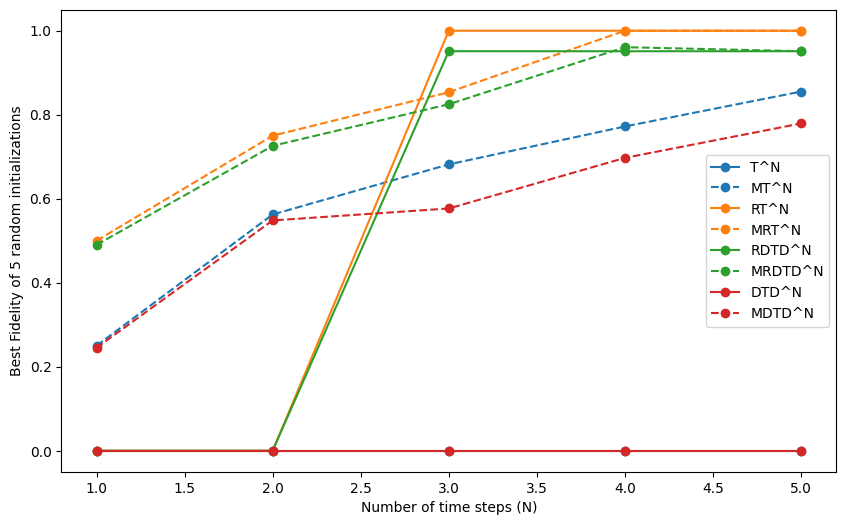

In [4]:
from matplotlib import pyplot as plt

# Plotting
labels_wo_msmt = [
    "T^N", "RT^N", "RDTD^N", "DTD^N",
]

labels_w_msmt = [
    "MT^N", "MRT^N", "MRDTD^N", "MDTD^N"
]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

fig, ax = plt.subplots(figsize=(10, 6))
for label1, label2, f1, f2, color in zip(labels_wo_msmt, labels_w_msmt, fidelities_wo_msmt, fidelities_w_msmt, colors):
    ax.plot(N_timesteps, f1, marker='o', label=label1, color=color)
    ax.plot(N_timesteps, f2, marker='o', label=label2, linestyle='--', color=color)
    ax.legend()
ax.set_xlabel("Number of time steps (N)")
ax.set_ylabel("Best Fidelity of 5 random initializations")

fig.savefig("fig2.png", dpi=300)